Mean Absolute Error: 0.19275666861698562
R-squared: 0.9337784609841071


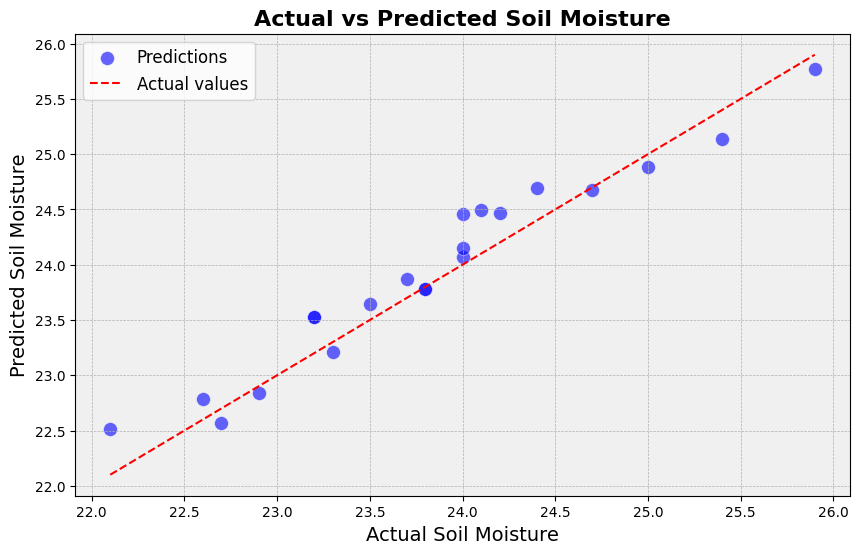

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('soil_moisture_data.csv')

# Handle missing values
data.ffill(inplace=True)

# Encode categorical variable
X = pd.get_dummies(data[['temperature', 'humidity', 'soil_type']], drop_first=True)
y = data['soil_moisture']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean absolute error and R-squared value
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions', s=100, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Actual values')
plt.xlabel('Actual Soil Moisture', fontsize=14)
plt.ylabel('Predicted Soil Moisture', fontsize=14)
plt.title('Actual vs Predicted Soil Moisture', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#f0f0f0')
plt.show()
